## Clustering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

data = pd.read_csv('clean_dataframe.csv', index_col=0)
data

,"('T', 'xacc', 'mean')","('T', 'xacc', 'std')","('T', 'xacc', 'min')","('T', 'xacc', '25%')","('T', 'xacc', '50%')","('T', 'xacc', '75%')","('T', 'xacc', 'max')","('T', 'yacc', 'mean')","('T', 'yacc', 'std')","('T', 'yacc', 'min')",...,"('LL', 'ymag', '50%')","('LL', 'ymag', '75%')","('LL', 'ymag', 'max')","('LL', 'zmag', 'mean')","('LL', 'zmag', 'std')","('LL', 'zmag', 'min')","('LL', 'zmag', '25%')","('LL', 'zmag', '50%')","('LL', 'zmag', '75%')","('LL', 'zmag', 'max')"
0,9.359757,0.293035,7.9657,9.2363,9.3679,9.5178,10.6150,1.027443,0.603110,-0.78544,...,-0.034141,-0.027868,-0.014492,0.251273,0.006244,0.235590,0.246950,0.252920,0.255730,0.26254
1,9.455824,0.806650,8.0414,8.9040,9.3383,9.8339,12.5100,-0.587637,1.423511,-3.18580,...,0.172620,0.325530,0.464830,0.451550,0.167177,-0.040247,0.370050,0.473460,0.588790,0.66169
2,9.413740,0.390297,8.5235,9.1655,9.3158,9.6536,10.5040,0.704964,0.925802,-1.86660,...,-0.173930,-0.146740,0.026178,0.199156,0.152890,-0.238900,0.106270,0.242670,0.311820,0.45890
3,9.491654,0.207121,8.7278,9.3690,9.5035,9.6005,10.3680,-0.210449,0.211567,-0.97454,...,-0.385510,-0.351600,-0.197670,0.701586,0.041030,0.602320,0.679340,0.702410,0.730940,0.77657
4,9.520442,0.133295,9.1067,9.4562,9.5262,9.5912,9.9332,-0.994991,0.241968,-1.82350,...,0.075147,0.227920,0.337960,0.462670,0.067394,0.334190,0.409420,0.443240,0.513870,0.59323
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9115,9.160420,2.681516,3.9391,6.7850,9.5246,11.2690,14.0790,0.730624,1.403434,-2.76460,...,0.366860,0.452930,0.506230,0.055666,0.061902,-0.076343,-0.002128,0.068123,0.110170,0.15306
9116,9.339332,2.622927,3.2902,6.9888,9.8595,11.2480,15.3320,0.691049,1.341564,-1.77400,...,0.325550,0.389660,0.456140,0.013131,0.069190,-0.116450,-0.057969,0.020197,0.081878,0.12244
9117,9.187042,2.756884,3.7657,6.7729,9.3943,11.0700,15.0760,0.495131,1.458675,-2.95120,...,0.365200,0.446950,0.511730,0.041460,0.060306,-0.077492,-0.014530,0.048946,0.094196,0.15939
9118,9.278632,2.817662,3.6010,6.6485,9.6776,11.4010,15.1750,0.959334,1.287001,-1.71060,...,0.317810,0.390050,0.442860,0.017258,0.066386,-0.089226,-0.054698,0.030437,0.082306,0.11026


In [16]:
#
# Scaling dei dati
#

scaler = StandardScaler()
scaler.fit(data)
data_scaled = scaler.transform(data)
print(data_scaled)
print(f'mean of scaled features {np.mean(data_scaled,0)}')
print(f'st.dev. of scaled features {np.std(data_scaled,0)}')

[[ 0.          0.4241802  -0.62960683 ...  0.5304308   0.41653347
   0.25780457]
 [ 0.          0.44974484 -0.4799828  ...  1.15964622  1.35488043
   1.36603141]
 [ 0.          0.43854578 -0.60127286 ...  0.50118686  0.57455869
   0.80299165]
 ...
 [ 0.          0.37821861  0.08815028 ... -0.05152071 -0.03856452
  -0.02858801]
 [ 0.          0.40259192  0.10585577 ... -0.10432813 -0.07206282
  -0.16499584]
 [ 0.          0.41577809  0.05630433 ... -0.01714696  0.01134204
  -0.00198945]]
mean of scaled features [ 0.00000000e+00 -6.85611412e-17 -2.96059473e-17 -2.80477396e-17
  1.93217761e-16  3.52154952e-16  1.10632751e-16  1.24656620e-17
  0.00000000e+00  7.47939722e-17  9.34924652e-17 -9.50506730e-17
 -4.98626481e-17  1.86984930e-17  0.00000000e+00  4.05134016e-17
  0.00000000e+00 -8.41432187e-17  8.72596342e-17  6.23283102e-18
 -1.24656620e-17  1.02841712e-16  3.11641551e-17  5.29790636e-17
  0.00000000e+00  2.33731163e-18  3.11641551e-17  2.49313241e-17
  6.23283102e-17 -9.34924652e

In [17]:
#
# Viene eseguito il clustering di tipo K-Means con K=19 (il numero delle attività)
#

K = 19 
kmeans_model = KMeans(n_clusters=K, init='random', n_init=500)
kmeans_model.fit(data_scaled)
labels = kmeans_model.labels_
print(f'obtained clustering \n {labels}\n')
print(f'clusters centroids\n {kmeans_model.cluster_centers_}\n')
print(f'final overall distance points-centroids {kmeans_model.inertia_}')

obtained clustering 
 [14 10 10 ...  8  8  8]

clusters centroids
 [[ 0.          0.37836368 -0.58795707 ... -0.82414011 -0.86815106
  -0.93505085]
 [ 0.          0.37419257  2.83481124 ...  1.22968886  1.15950011
   1.07883087]
 [ 0.          0.46743781  2.46773397 ... -0.1864229  -0.13640926
  -0.01702807]
 ...
 [ 0.          0.33874432  2.76747274 ... -1.09666151 -1.13777024
  -1.05437536]
 [ 0.          0.18328731 -0.26039179 ...  0.08010641  0.06540505
   0.06974712]
 [ 0.          0.22369437 -0.57831325 ...  0.49581275  0.43561357
   0.33605091]]

final overall distance points-centroids 1000478.5911207092


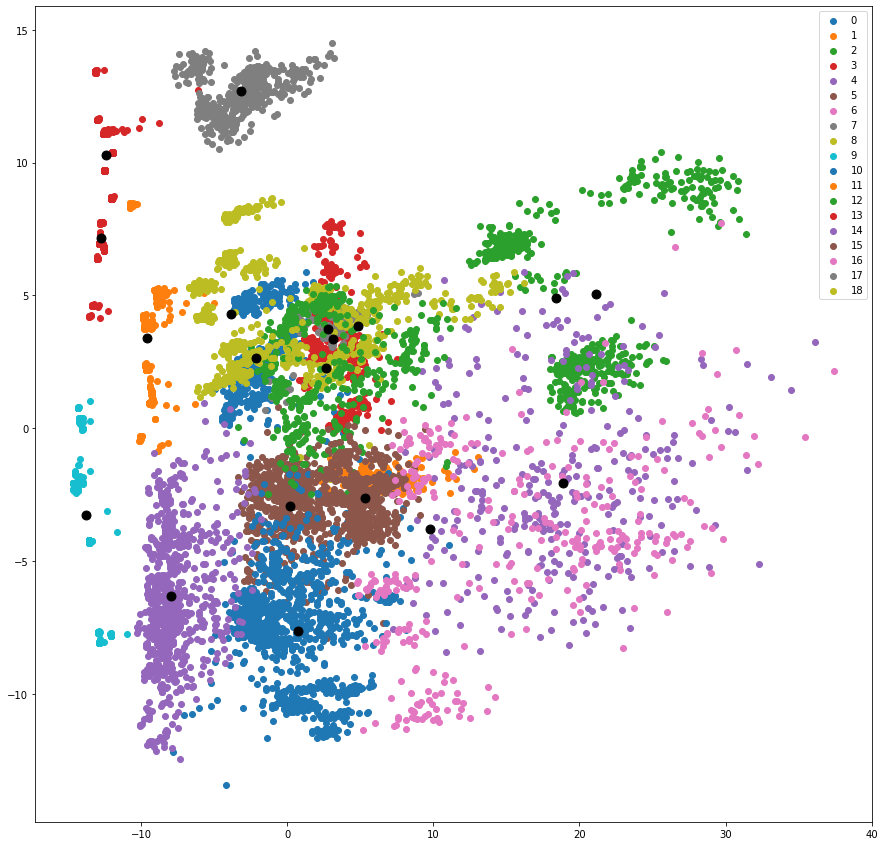

In [18]:
#
# Plotting dei punti del dataset in cui viene sfruttata la pca per plottare in 2-dim
# I punti in nero corrispondono ai centroidi
#

pca_model = PCA(n_components=30)
pca_coordinates = pca_model.fit_transform(data_scaled)
pca_centroids = pca_model.transform(kmeans_model.cluster_centers_)
centroids = kmeans_model.cluster_centers_
u_labels = np.unique(labels)

plt.figure(figsize=(15,15))
for i in u_labels:
    plt.scatter(pca_coordinates[labels == i , 0], pca_coordinates[labels == i , 1] , label = i)
plt.scatter(pca_centroids[:,0] , pca_centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

### Calcolo della silhouette

overall clustering silhouette 0.2463097416525351


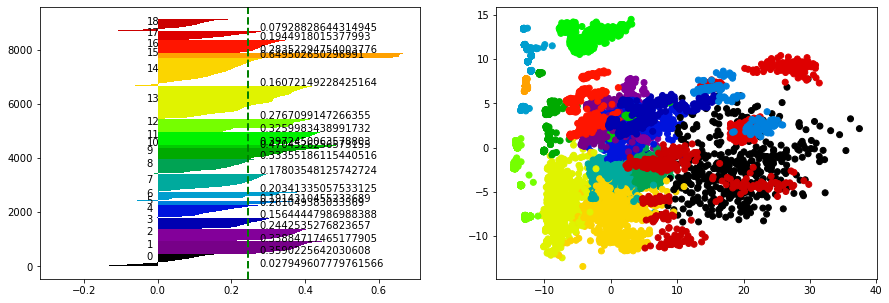

In [19]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

silhouette_avg = silhouette_score(data_scaled, y)
sample_silhouette_values = silhouette_samples(data_scaled, y)

print(f'overall clustering silhouette {silhouette_avg}')

fig, ax = plt.subplots(1,2,figsize=(15,5))
y_lower = 0 
y_upper = 0
for i,cluster in enumerate(np.unique(y)):
    cluster_silhouette_vals = sample_silhouette_values[y == cluster]
    cluster_silhouette_vals.sort()
    cluster_silhouette_mean=cluster_silhouette_vals.mean()
    y_upper += len(cluster_silhouette_vals)
    color = cm.nipy_spectral(float(i) / K)
    ax[0].barh(range(y_lower,y_upper), cluster_silhouette_vals, height=1, color=color)
    ax[0].text(-0.03, (y_lower+y_upper)/2, str(i))
    ax[0].text(silhouette_avg+0.03, y_lower, cluster_silhouette_mean)  
    y_lower += len(cluster_silhouette_vals)

ax[0].axvline(silhouette_avg, linestyle ='--', linewidth =2, color = 'green')
colors = cm.nipy_spectral(y.astype(float) / K)
ax[1].scatter(pca_coordinates[:, 0], pca_coordinates[:, 1], c=colors)

